<a href="https://colab.research.google.com/github/vinodk1994/First-Project/blob/main/Supermart_Grocery_Sales_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Introduction**
-----
1.1 Objective:
--
The objective of this analysis is to explore the sales dataset to evaluate total sales and profits across different categories while identifying trends over time. It aims to analyze profitability by determining profit margins and assessing the impact of discounts on sales. Additionally, the analysis seeks to understand customer behavior by identifying top customers and their purchasing patterns. Geographical trends will also be explored to assess sales performance by region, informing targeted marketing strategies. Ultimately, the analysis aims to provide actionable insights and generate recommendations to optimize sales strategies effectively.

1.2 Scope of Analysis
--
The analysis will focus on providing a comprehensive view of the sales and profit trends across various dimensions of the dataset. The following key areas will be analyzed:

A) Total Sales and Profit by Region:

This part of the analysis will break down the total sales and profit by different regions (North, South, East, West, etc.), helping to identify which regions are the most profitable and where sales are the highest.
Insights from this analysis will help to assess the performance of each region and inform region-specific marketing or sales strategies.

B) Total Sales and Profit by Category:

The analysis will group data by major product categories (e.g., Beverages, Food Grains, Fruits & Veggies, etc.) to evaluate total sales and profit for each category.This will allow us to determine which product categories contribute most to overall sales and profit, helping guide inventory and product development strategies.

C) Total Sales and Profit by Sub-Category:

A more detailed analysis will be performed by further breaking down the product categories into sub-categories (e.g., Masalas, Health Drinks, Fresh Vegetables, etc.).This will help to pinpoint the specific sub-categories that drive the most revenue and profit, allowing for a targeted approach in promotions and marketing efforts.

D) Sales Over Time (Year-wise):

The time-series analysis of sales will track the performance year over year. This will help to identify seasonal trends, annual growth, or decline in sales.
Understanding how sales fluctuate over time is crucial for forecasting and future planning.

E) Profit Analysis:

A focused analysis on profit margins and their drivers will be conducted. This will include the impact of discounts, cost, and sales price on profitability.
The goal is to identify opportunities for improving profit margins and cost-saving measures that can be implemented for maximum profitability.

Data Description
--
Dataset Overview:
The dataset consists of supermarket sales across various regions, product categories, and sub-categories. It provides detailed insights into customer transactions, including order details, sales performance, profit margins, and discounts. The data includes multiple records, each representing a customer order, allowing for a comprehensive analysis of sales and profitability trends.

**A) Number of Records:** The dataset contains several rows representing individual customer orders.

**B) General Context:** The dataset captures sales performance at a granular level, enabling analysis by region, category, sub-category, customer behavior, and time. It serves as the foundation for evaluating sales strategies, customer preferences, and profitability.


**Data Dictionary:**
--
Here is a description of each column in the dataset:

Column Name and its Description

**Order ID -** Unique identifier for each customer order.

**Customer Name -** Name of the customer who placed the order.

**Category -** The broad product category (e.g., Beverages, Food Grains, Fruits & Veggies).

**Sub Category -** The specific product sub-category (e.g., Masalas, Fresh Vegetables, Health Drinks).

**City -** The city where the order was placed.

**Order Date -**	The date the order was placed.

**Region -** The region where the order was placed (e.g., North, South, West, Central).

**Sales	-** Total sales amount for the order.

**Discount -** Discount applied to the order (as a fraction of the total sales).

**Profit -** Profit generated from the order, calculated as sales minus cost.

**State -** The state where the order was placed (e.g., Tamil Nadu).


In [ ]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [22]:
# import csv file
df = pd.read_csv('/content/Supermart Grocery Sales Dataset.csv')

## Exploratory Data Analysis

In [23]:
# to check how many column or row present in dataset
df.shape

(9994, 11)

In [24]:
# to check the dataset
df.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## Data Cleaning and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Order ID    9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
#check for null values
pd.isnull(df).sum()

ï»¿Order ID      0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [ ]:
#drop unrelated/blank columns
df.dropna(inplace=True)

In [ ]:
# Rename column 'old_column_name' to 'new_column_name'
df = df.rename(columns={'ï»¿Order ID': 'Order ID'})

In [ ]:
## Displaying Column Names
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [ ]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,1496.596158,577.559036,500.00,1000.0000,1498.00,1994.7500,2500.00
Discount,9994.0,0.226817,0.074636,0.10,0.1600,0.23,0.2900,0.35
Profit,9994.0,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95


In [ ]:
## Convert 'Date' into Date-time Type
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df)

     Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

     Order Date Region  Sal

In [ ]:
# Extract the year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
print(df)

     Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

     Order Date Region  Sal

## Exploratory Data Analysis

In [ ]:
## Total Sales and profit by Region
Region_sales_profit = df.groupby('Region')[['Sales','Profit']].sum()
print(Region_sales_profit)

           Sales      Profit
Region                      
Central  3468156   856806.84
East     4248368  1074345.58
North       1254      401.28
South    2440461   623562.89
West     4798743  1192004.61


In [ ]:
## Total Sales and profit by Category
Category_sales_profit = df.groupby('Category')[['Sales','Profit']].sum()
print(Category_sales_profit)

                     Sales     Profit
Category                             
Bakery             2112281  528521.06
Beverages          2085313  525605.76
Eggs, Meat & Fish  2267401  567357.22
Food Grains        2115272  529162.64
Fruits & Veggies   2100727  530400.38
Oil & Masala       2038442  497895.29
Snacks             2237546  568178.85


In [ ]:
## Total Sales and profit by Sub-Category
Sub_Category_sales_profit = df.groupby('Sub Category')[['Sales','Profit']].sum()
print(Sub_Category_sales_profit)

                      Sales     Profit
Sub Category                          
Atta & Flour         534649  127861.10
Biscuits             684083  169357.62
Breads & Buns        742586  190764.98
Cakes                685612  168398.46
Chicken              520497  124049.89
Chocolates           733898  183849.34
Cookies              768213  190643.70
Dals & Pulses        523371  130232.29
Edible Oil & Ghee    668086  168593.58
Eggs                 575156  144669.92
Fish                 560548  147248.01
Fresh Fruits         551212  134668.35
Fresh Vegetables     525842  131273.33
Health Drinks       1051439  267469.79
Masalas              697480  168999.11
Mutton               611200  151389.40
Noodles              735435  193685.81
Organic Fruits       503402  130862.33
Organic Staples      558929  144136.89
Organic Vegetables   520271  133596.37
Rice                 498323  126932.36
Soft Drinks         1033874  258135.97
Spices               672876  160302.60


In [26]:
## Profit Analysis
# Calculate Profit Margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Display profit margins
profit_summary = df[['Profit', 'Profit Margin', 'Discount']].describe()
print(profit_summary)

            Profit  Profit Margin     Discount
count  9994.000000    9994.000000  9994.000000
mean    374.937082      25.022814     0.226817
std     239.932881      11.891899     0.074636
min      25.250000       5.000000     0.100000
25%     180.022500      15.000000     0.160000
50%     320.780000      25.000000     0.230000
75%     525.627500      35.000000     0.290000
max    1120.950000      45.000000     0.350000


In [ ]:
## Sales Over Time (Year-wise)
# Convert 'Order Date' to datetime and extract the year
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Year'] = df['Order Date'].dt.year

# Group by Year and sum up Sales and Profit
year_sales_profit = df.groupby('Year')[['Sales', 'Profit']].sum()

# Calculate profit percentage as (Profit / Sales) * 100 and round to two decimal places
year_sales_profit['Profit Percentage'] = (year_sales_profit['Profit'] / year_sales_profit['Sales']) * 100
year_sales_profit['Profit Percentage'] = year_sales_profit['Profit Percentage'].round(2)

# Convert the rounded profit percentage to string format with '%' sign
year_sales_profit['Profit Percentage'] = year_sales_profit['Profit Percentage'].astype(str) + '%'

print(year_sales_profit)

        Sales      Profit Profit Percentage
Year                                       
2015  2975599   752529.11            25.29%
2016  3131959   797192.99            25.45%
2017  3871912   953216.22            24.62%
2018  4977512  1244182.88             25.0%


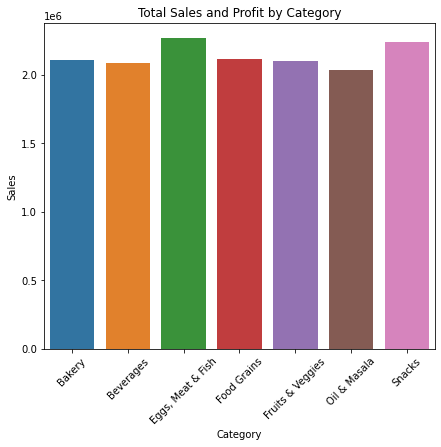

In [ ]:
## Sales and Profit by Category (Bar Plot)
plt.figure(figsize=(7, 6))
sns.barplot(x=Category_sales_profit.index, y='Sales', data=Category_sales_profit.reset_index())
plt.title('Total Sales and Profit by Category')
plt.xticks(rotation=45)
plt.show()

#### Total Revenue by Category

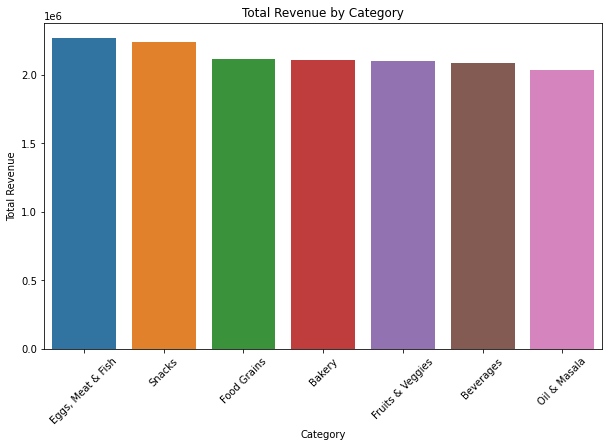

In [ ]:
# Group by product and calculate total revenue
Category_revenue = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=Category_revenue.index, y=Category_revenue.values)
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate product names for better readability
plt.show()

Analyze Discounts and Profits

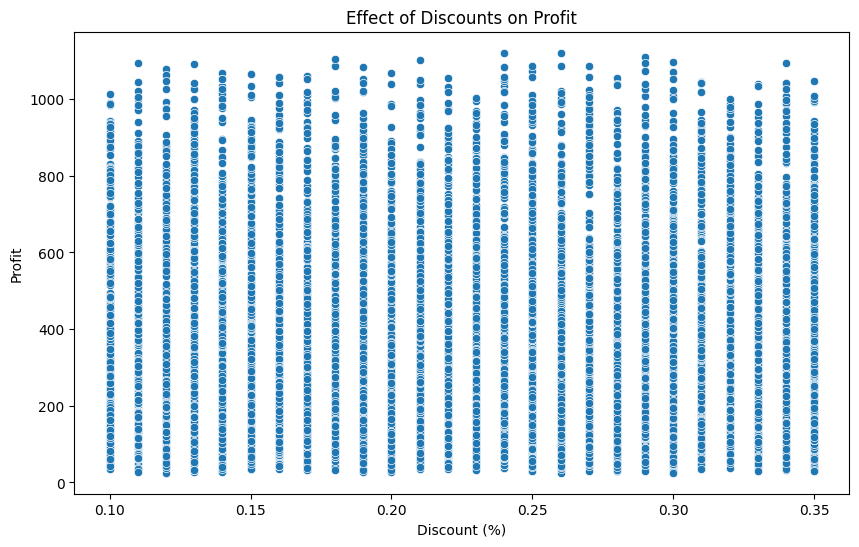

In [27]:
# Plotting the effect of discounts on profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Effect of Discounts on Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.show()

### Top-Selling Products per Region

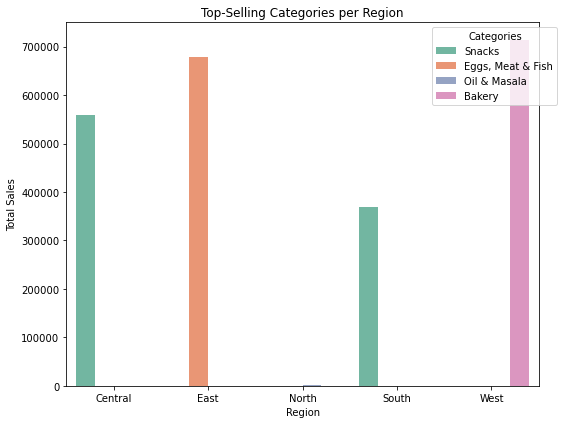

In [ ]:
# Group by region and Category, then calculate total revenue
region_Category_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Find the top-selling product in each region
top_Category_per_region = region_Category_sales.loc[region_Category_sales.groupby('Region')['Sales'].idxmax()]

# Create the bar plot for top-selling products per region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Category', data=top_Category_per_region, palette='Set2', dodge=True)
plt.title('Top-Selling Categories per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout(rect=[0,0,0.8,1])
plt.show()

## Key Insights

# Here are the some key insight from the data set

**Sales by Region:**
--
The analysis shows that certain regions, such as South and West, are consistently generating higher sales compared to others like North and Central.
This suggests the need to focus marketing and sales efforts on underperforming regions or to explore opportunities to enhance services in regions with higher sales.

**Profit by Category and Sub-Category:**
--
Categories like Food Grains and Fruits & Veggies contribute significantly to overall sales, but Beverages and Bakery have higher profit margins.
Sub-categories such as Health Drinks and Fresh Vegetables show high sales volume but with lower profit margins, possibly due to high discounting or operational costs.

**Sales and Profit Over Time:**
--
A year-wise analysis reveals fluctuating sales, with peaks during certain months, likely indicating seasonal trends in customer buying behavior.
Profit margins have generally remained steady over time, but discounts have had a noticeable impact on profits, particularly during high-sales periods.

**Impact of Discounts on Profit:**
--
High discounts have been observed to reduce profit margins significantly. Orders with higher discounts tend to show lower profitability, even when sales volumes are high.Strategic discounting might be necessary to balance between increasing sales and protecting profit margins.


## Conclusion

This analysis provides critical insights into the sales performance and profitability of the supermarket. While some categories and regions perform well, there are clear opportunities to optimize pricing strategies, reduce over-discounting, and target regions with lower sales to drive growth.

The insights suggest that focusing on high-profit categories and strategic discounting will help maximize profitability. Additionally, understanding customer behavior and geographic trends can help tailor marketing strategies to further boost sales and customer loyalty.

## Recommendations:



1) Focus marketing efforts on high-profit regions and sub-categories.

2) Reevaluate discounting strategies to avoid cutting into profits.

3)Explore retention strategies for high-value customers.

4)Use time-based trends to forecast demand and optimize inventory.